In [4]:
from models.transformer_only import visualize_attention

model_name = 'dp-hek293t-pe2'
attentions, counts = visualize_attention(percentage=0.1, model_name=model_name, num_encoder_units=5, annot=True, onehot=True)

# save the attention matrix
import numpy as np
np.save(f'attentions-{model_name}-transformer-only.npy', attentions)
np.save(f'counts-{model_name}-transformer-only.npy', counts)

100%|██████████| 769/769 [00:12<00:00, 63.65it/s]
/home/lupeiheng/development/ox-dissertation/models/transformer_only.py:1000: RuntimeWarning: invalid value encountered in divide
  attentions[i][k] /= counts[i][k]


[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0 189 191 195 184 139  81 105  81 124 128  88 115 118  86  91
 115  95  84  66  80  77  77  74  57  45  51  37  38  33  30   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0]
Attention weights for edit type replace


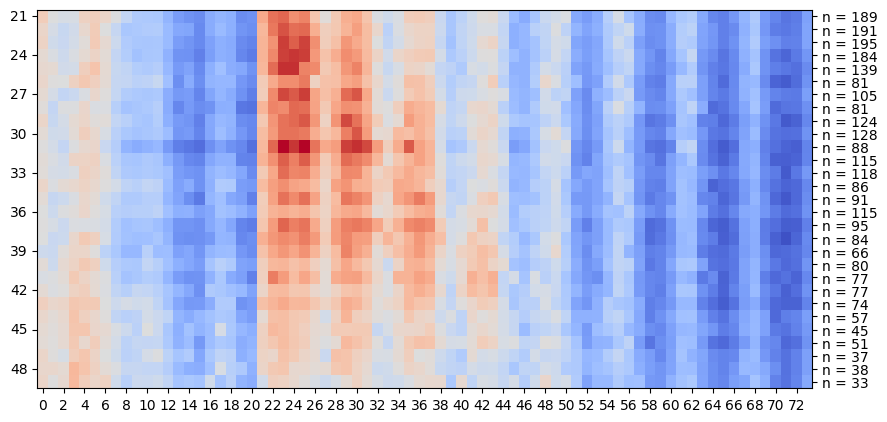

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0  64  63  49  65 103  10  64  57  41  42  39  37  40  30  40
  26  25  35  21  24  21  22  16  12  11  11  11  11  11   6   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0]
Attention weights for edit type insertion


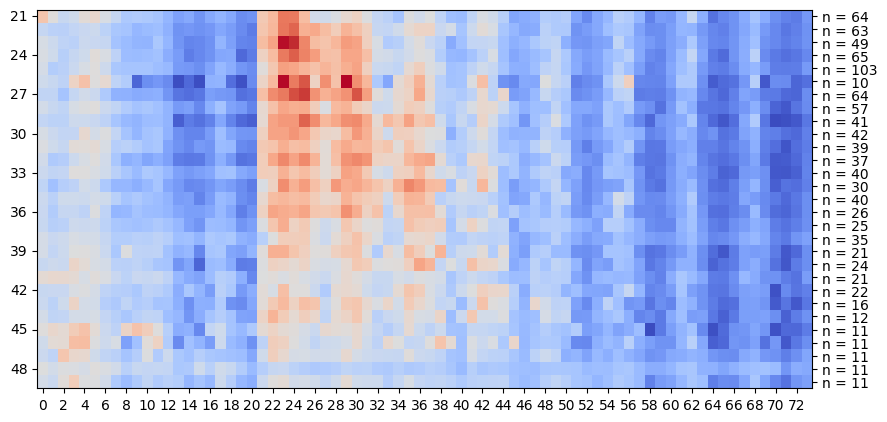

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 36 47 53
 46 52 45 56 40 35 31 44 23 31 29 26 17 18 14 13 18 20 10  8 14  9  7 13
  3  3  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0]
Attention weights for edit type deletion


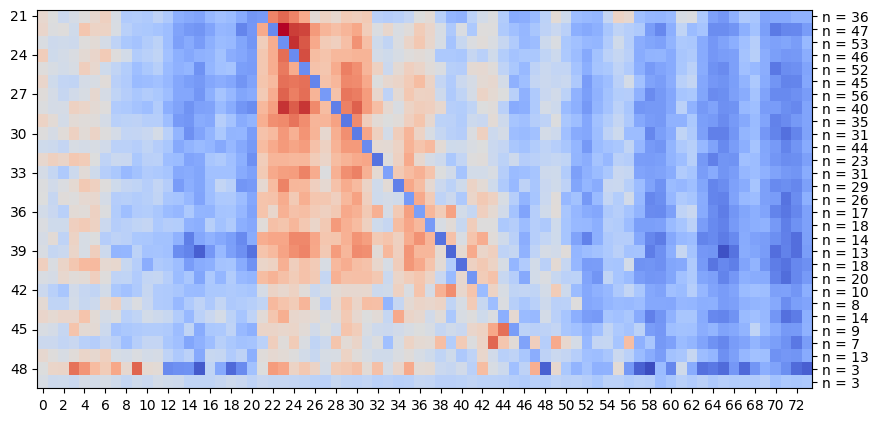

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

model_name = 'dp-hek293t-pe2'

attentions = np.load(f'attentions-{model_name}-transformer-only.npy', allow_pickle=True)
counts = np.load(f'counts-{model_name}-transformer-only.npy', allow_pickle=True)


num_heads = 2
# plot the attention weights for each head and edit type
# plot the attention weights for each head and edit type
for i, data in enumerate(['replace', 'insertion', 'deletion']):
    # y lim is where the count value is larger than 0
    y_lim_lower = 0
    y_lim_upper = 0
    for ind, c in enumerate(counts[i]):
        if ind == 0: continue
        if c > 0 and y_lim_lower == 0:
            y_lim_lower = ind
        if c > 0:
            y_lim_upper = ind
    y_lim = (y_lim_upper, y_lim_lower)
    fig_size_y = 10 * (y_lim_upper - y_lim_lower) / 74
    
    fig, ax = plt.subplots(1, 1, figsize=(10, fig_size_y+1))
    # highlight the diagonal
    sns.heatmap(attentions[i], cmap='coolwarm', ax=ax, annot=False, cbar=False)
    # remove the part of the heatmap with nan values
    ax.set_ylim(y_lim)
    # additional y axis ticks on the right showing the counts
    ax2 = ax.twinx()
    print(counts[i])
    ax2.set_yticks(np.arange(len(counts[i])) + 0.5)
    ax2.set_yticklabels([f'n = {c}' for c in counts[i]])
    ax2.set_ylim(y_lim)
    print(f'Attention weights for edit type {data}')
    plt.show()

In [6]:
from models.transformer import visualize_attention

model_name = 'dp-hek293t-pe2'
attentions, counts = visualize_attention(percentage=0.01, model_name=model_name, num_encoder_units=3, annot=False, onehot=True)

# save the attention matrix
import numpy as np
np.save(f'attentions-{model_name}-transformer.npy', attentions)
np.save(f'counts-{model_name}-transformer.npy', counts)

RuntimeError: Error(s) in loading state_dict for PrimeDesignTransformer:
	size mismatch for transformer.encoder.layers.0.self_attn.linears.0.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.encoder.layers.0.self_attn.linears.0.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.encoder.layers.0.self_attn.linears.1.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.encoder.layers.0.self_attn.linears.1.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.encoder.layers.0.self_attn.linears.2.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.encoder.layers.0.self_attn.linears.2.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.encoder.layers.0.self_attn.linears.3.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.encoder.layers.0.self_attn.linears.3.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.encoder.layers.0.feed_forward.linear1.weight: copying a param with shape torch.Size([100, 6]) from checkpoint, the shape in current model is torch.Size([100, 4]).
	size mismatch for transformer.encoder.layers.0.feed_forward.linear2.weight: copying a param with shape torch.Size([6, 100]) from checkpoint, the shape in current model is torch.Size([4, 100]).
	size mismatch for transformer.encoder.layers.0.feed_forward.linear2.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.encoder.layers.0.sublayer.0.norm.weight: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.encoder.layers.0.sublayer.0.norm.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.encoder.layers.0.sublayer.1.norm.weight: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.encoder.layers.0.sublayer.1.norm.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.encoder.layers.1.self_attn.linears.0.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.encoder.layers.1.self_attn.linears.0.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.encoder.layers.1.self_attn.linears.1.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.encoder.layers.1.self_attn.linears.1.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.encoder.layers.1.self_attn.linears.2.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.encoder.layers.1.self_attn.linears.2.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.encoder.layers.1.self_attn.linears.3.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.encoder.layers.1.self_attn.linears.3.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.encoder.layers.1.feed_forward.linear1.weight: copying a param with shape torch.Size([100, 6]) from checkpoint, the shape in current model is torch.Size([100, 4]).
	size mismatch for transformer.encoder.layers.1.feed_forward.linear2.weight: copying a param with shape torch.Size([6, 100]) from checkpoint, the shape in current model is torch.Size([4, 100]).
	size mismatch for transformer.encoder.layers.1.feed_forward.linear2.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.encoder.layers.1.sublayer.0.norm.weight: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.encoder.layers.1.sublayer.0.norm.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.encoder.layers.1.sublayer.1.norm.weight: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.encoder.layers.1.sublayer.1.norm.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.encoder.layers.2.self_attn.linears.0.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.encoder.layers.2.self_attn.linears.0.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.encoder.layers.2.self_attn.linears.1.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.encoder.layers.2.self_attn.linears.1.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.encoder.layers.2.self_attn.linears.2.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.encoder.layers.2.self_attn.linears.2.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.encoder.layers.2.self_attn.linears.3.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.encoder.layers.2.self_attn.linears.3.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.encoder.layers.2.feed_forward.linear1.weight: copying a param with shape torch.Size([100, 6]) from checkpoint, the shape in current model is torch.Size([100, 4]).
	size mismatch for transformer.encoder.layers.2.feed_forward.linear2.weight: copying a param with shape torch.Size([6, 100]) from checkpoint, the shape in current model is torch.Size([4, 100]).
	size mismatch for transformer.encoder.layers.2.feed_forward.linear2.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.encoder.layers.2.sublayer.0.norm.weight: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.encoder.layers.2.sublayer.0.norm.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.encoder.layers.2.sublayer.1.norm.weight: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.encoder.layers.2.sublayer.1.norm.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.encoder.norm.weight: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.encoder.norm.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.0.self_attn.linears.0.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.decoder.layers.0.self_attn.linears.0.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.0.self_attn.linears.1.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.decoder.layers.0.self_attn.linears.1.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.0.self_attn.linears.2.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.decoder.layers.0.self_attn.linears.2.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.0.self_attn.linears.3.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.decoder.layers.0.self_attn.linears.3.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.0.cross_attn.linears.0.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.decoder.layers.0.cross_attn.linears.0.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.0.cross_attn.linears.1.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.decoder.layers.0.cross_attn.linears.1.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.0.cross_attn.linears.2.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.decoder.layers.0.cross_attn.linears.2.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.0.cross_attn.linears.3.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.decoder.layers.0.cross_attn.linears.3.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.0.feed_forward.linear1.weight: copying a param with shape torch.Size([100, 6]) from checkpoint, the shape in current model is torch.Size([100, 4]).
	size mismatch for transformer.decoder.layers.0.feed_forward.linear2.weight: copying a param with shape torch.Size([6, 100]) from checkpoint, the shape in current model is torch.Size([4, 100]).
	size mismatch for transformer.decoder.layers.0.feed_forward.linear2.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.0.sublayer.0.norm.weight: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.0.sublayer.0.norm.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.0.sublayer.1.norm.weight: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.0.sublayer.1.norm.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.0.sublayer.2.norm.weight: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.0.sublayer.2.norm.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.1.self_attn.linears.0.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.decoder.layers.1.self_attn.linears.0.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.1.self_attn.linears.1.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.decoder.layers.1.self_attn.linears.1.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.1.self_attn.linears.2.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.decoder.layers.1.self_attn.linears.2.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.1.self_attn.linears.3.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.decoder.layers.1.self_attn.linears.3.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.1.cross_attn.linears.0.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.decoder.layers.1.cross_attn.linears.0.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.1.cross_attn.linears.1.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.decoder.layers.1.cross_attn.linears.1.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.1.cross_attn.linears.2.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.decoder.layers.1.cross_attn.linears.2.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.1.cross_attn.linears.3.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.decoder.layers.1.cross_attn.linears.3.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.1.feed_forward.linear1.weight: copying a param with shape torch.Size([100, 6]) from checkpoint, the shape in current model is torch.Size([100, 4]).
	size mismatch for transformer.decoder.layers.1.feed_forward.linear2.weight: copying a param with shape torch.Size([6, 100]) from checkpoint, the shape in current model is torch.Size([4, 100]).
	size mismatch for transformer.decoder.layers.1.feed_forward.linear2.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.1.sublayer.0.norm.weight: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.1.sublayer.0.norm.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.1.sublayer.1.norm.weight: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.1.sublayer.1.norm.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.1.sublayer.2.norm.weight: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.1.sublayer.2.norm.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.2.self_attn.linears.0.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.decoder.layers.2.self_attn.linears.0.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.2.self_attn.linears.1.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.decoder.layers.2.self_attn.linears.1.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.2.self_attn.linears.2.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.decoder.layers.2.self_attn.linears.2.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.2.self_attn.linears.3.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.decoder.layers.2.self_attn.linears.3.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.2.cross_attn.linears.0.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.decoder.layers.2.cross_attn.linears.0.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.2.cross_attn.linears.1.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.decoder.layers.2.cross_attn.linears.1.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.2.cross_attn.linears.2.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.decoder.layers.2.cross_attn.linears.2.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.2.cross_attn.linears.3.weight: copying a param with shape torch.Size([6, 6]) from checkpoint, the shape in current model is torch.Size([4, 4]).
	size mismatch for transformer.decoder.layers.2.cross_attn.linears.3.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.2.feed_forward.linear1.weight: copying a param with shape torch.Size([100, 6]) from checkpoint, the shape in current model is torch.Size([100, 4]).
	size mismatch for transformer.decoder.layers.2.feed_forward.linear2.weight: copying a param with shape torch.Size([6, 100]) from checkpoint, the shape in current model is torch.Size([4, 100]).
	size mismatch for transformer.decoder.layers.2.feed_forward.linear2.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.2.sublayer.0.norm.weight: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.2.sublayer.0.norm.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.2.sublayer.1.norm.weight: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.2.sublayer.1.norm.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.2.sublayer.2.norm.weight: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.layers.2.sublayer.2.norm.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.norm.weight: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.decoder.norm.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for transformer.wt_embed.position_encoding: copying a param with shape torch.Size([1, 99, 6]) from checkpoint, the shape in current model is torch.Size([1, 99, 4]).
	size mismatch for transformer.mut_embed.position_encoding: copying a param with shape torch.Size([1, 99, 6]) from checkpoint, the shape in current model is torch.Size([1, 99, 4]).
	size mismatch for transformer_pool.queryv: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([4]).
	size mismatch for head.0.weight: copying a param with shape torch.Size([134]) from checkpoint, the shape in current model is torch.Size([132]).
	size mismatch for head.0.bias: copying a param with shape torch.Size([134]) from checkpoint, the shape in current model is torch.Size([132]).
	size mismatch for head.2.weight: copying a param with shape torch.Size([1, 134]) from checkpoint, the shape in current model is torch.Size([1, 132]).

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

model_name = 'dp-hek293t-pe2'

attentions = np.load(f'attentions-{model_name}-transformer-only.npy', allow_pickle=True)
counts = np.load(f'counts-{model_name}-transformer-only.npy', allow_pickle=True)


num_heads = 2
# plot the attention weights for each head and edit type
# plot the attention weights for each head and edit type
for i, data in enumerate(['replace', 'insertion', 'deletion']):
    # y lim is where the count value is larger than 0
    y_lim_lower = 0
    y_lim_upper = 0
    for ind, c in enumerate(counts[i]):
        if ind == 0: continue
        if c > 0 and y_lim_lower == 0:
            y_lim_lower = ind
        if c > 0:
            y_lim_upper = ind
    y_lim = (y_lim_upper, y_lim_lower)
    fig_size_y = 10 * (y_lim_upper - y_lim_lower) / 74
    
    for j in range(num_heads):
        for layer in range(3):
            fig, ax = plt.subplots(1, 1, figsize=(10, fig_size_y+1))
            # highlight the diagonal
            sns.heatmap(attentions[i][layer][j], cmap='coolwarm', ax=ax, annot=False, cbar=False)
            # remove the part of the heatmap with nan values
            ax.set_ylim(y_lim)
            # additional y axis ticks on the right showing the counts
            ax2 = ax.twinx()
            print(counts[i])
            ax2.set_yticks(np.arange(len(counts[i])) + 0.5)
            ax2.set_yticklabels([f'n = {c}' for c in counts[i]])
            ax2.set_ylim(y_lim)
            print(f'Attention weights for head {j} and edit type {data} at layer {layer}')
            plt.show()